In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc, rcParams

from astropy import units as u
from astropy.coordinates import Angle
from astropy.coordinates import SkyCoord
from astropy.visualization.wcsaxes import SphericalCircle

In [2]:
f = 0.8

fontsize = 35 * f
labelsize = 35 * f


rc("xtick", labelsize=fontsize * f)
rc("ytick", labelsize=fontsize * f)
rcParams["axes.linewidth"] = 5.3 * f
rcParams["xtick.major.width"] = 5.3 * f
rcParams["xtick.minor.width"] = 5.3 * f
rcParams["ytick.major.width"] = 5.3 * f
rcParams["ytick.minor.width"] = 5.3 * f
rcParams["xtick.major.size"] = 12.5 * f
rcParams["xtick.minor.size"] = 6.5 * f
rcParams["ytick.major.size"] = 12.5 * f
rcParams["ytick.minor.size"] = 6.5 * f

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 50 * f,
        }


cmap = plt.get_cmap('gnuplot')
color_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
colors = [cmap(value) for value in color_values]

In [3]:
pointings = pd.read_csv("iDR4_pointings.csv")

In [4]:
field = pointings["Field"]
ra = pointings["RA"]
dec = pointings["DEC"]

In [5]:
#Defining the central coordinates and r200 of Hydra
ra0_hydra = 159.17
dec0_hydra = -27.524
r200_hydra = 1.5744

#Defining the central coordinates and r200 of Centaurus
ra0_centaurus = 192.20
dec0_centaurus = -41.31
r200_centaurus = 1.0

#Coordinates of Centaurus A (NGC 5128) galaxy
ra0_N5128 = 201.37
dec0_N5128 = -43.02

In [15]:
mask_hc = (ra < 220) & (ra > 140) & (dec < -15) & (dec > -50)

### Defining the region of Hydra-Centaurus Supercluster <br>
For this first moment, I will use approximately the region defined by L.N. da Costa et al. 1986 to select the pointings for the Hydra-Centaurus Supercluster. The region is defined by <br>

$$
140º < R.A. < 225º  \\
-15º < Dec. < -50
$$

In [6]:
ra_1 = Angle(140, u.degree)
ra_2 = Angle(185, u.degree) #I chose 185 because there is not S-PLUS data beyond that for Hydra-Centaurus
dec_1 = Angle(-50, u.degree)
dec_2 = Angle(-15, u.degree)

print("{:.5f} <= R.A. <= {:.5f}".format(ra_1.hour, ra_2.hour))
print("{} <= DEC. <= {}".format(dec_1.dms, dec_2.dms))

9.33333 <= R.A. <= 12.33333
dms_tuple(d=-50.0, m=-0.0, s=-0.0) <= DEC. <= dms_tuple(d=-15.0, m=-0.0, s=-0.0)


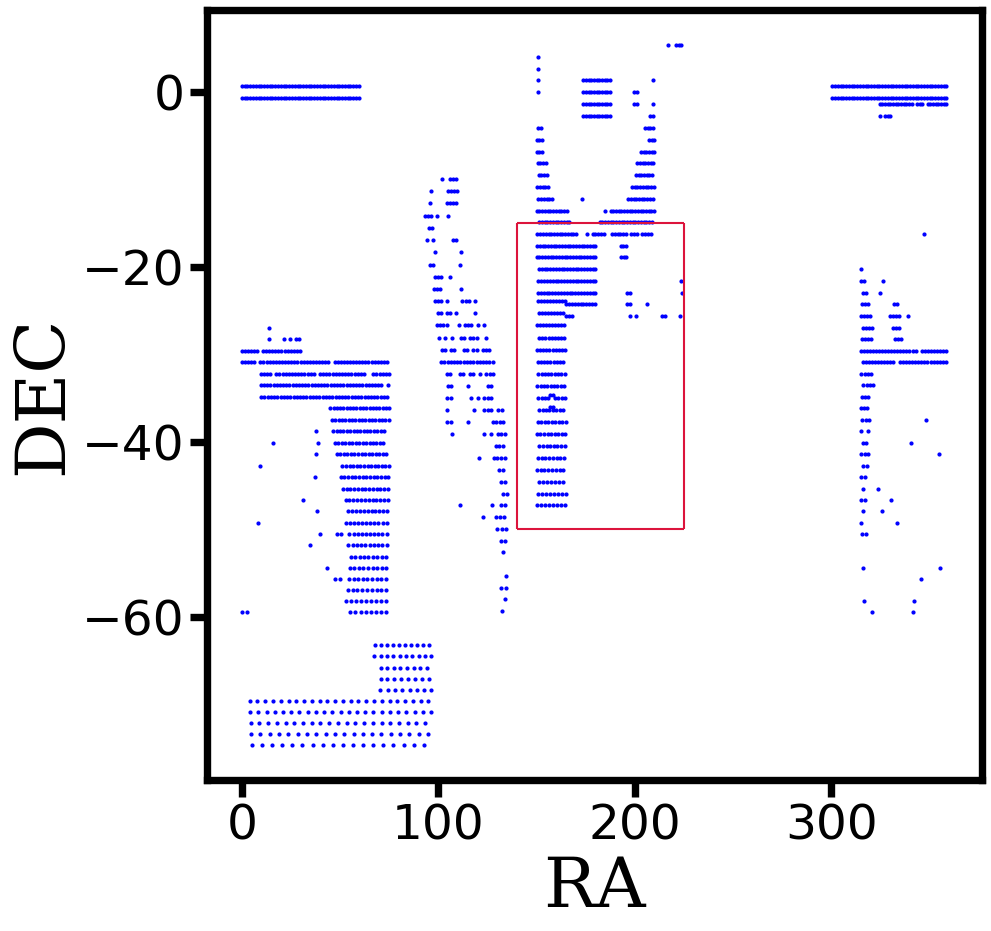

In [8]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.scatter(ra, dec, color="blue", s=4.0)
ax.set_xlabel("RA", fontdict=font)
ax.set_ylabel("DEC", fontdict=font)

ax.vlines(x=140, ymin=-50, ymax=-15, linestyle='-', color="crimson")
ax.vlines(x=225, ymin=-50, ymax=-15, linestyle='-', color="crimson")
ax.hlines(y=-50, xmin=140, xmax=225, linestyle='-', color="crimson")
ax.hlines(y=-15, xmin=140, xmax=225, linestyle='-', color="crimson")

In [18]:
mask = (ra < 225) & (ra > 140) & (dec < -15) & (dec > -50)

In [ ]:
field[mask].to_csv("Fields_HC.csv", index=False)

### Selecting fields for Hydra

In [18]:
def dist(ra, dec):
    return np.sqrt((ra - ra0_hydra)**2 + (dec - dec0_hydra)**2)

#Defining a mask for the objects inside 1R200 of Hydra
distances = dist(ra, dec)

In [20]:
mask_hydra = distances < 6.0*r200_hydra

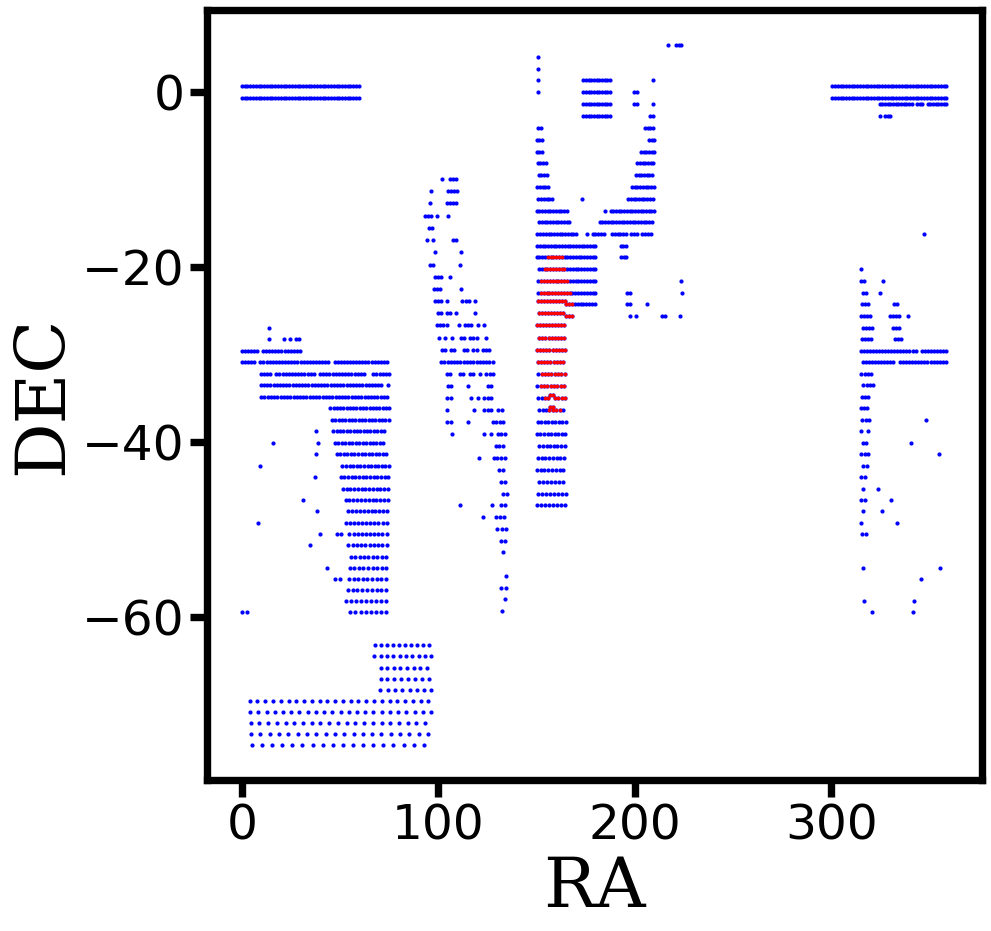

In [22]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.scatter(ra, dec, color="blue", s=4.0)
ax.set_xlabel("RA", fontdict=font)
ax.set_ylabel("DEC", fontdict=font)

ax.scatter(ra[mask_hydra], dec[mask_hydra], color="red", s=3.0)

In [13]:
field[mask_hydra].to_csv("../Hydra-analysis/fields_hydra.csv", index=False)

### Let's see if the data we have for Hydra-Centaurus in S-PLUS iDR4 covers 5R200 of the main clusters in the region
I will have to collect the names and location (RA x DEC) and R200's of the main clusters in Hydra-Centaurus, then I define a radius of 5º around each one to define the region that still needs to be observed

In [8]:
cl_names = ["N3393", "A1060", "N3054", "N3087", "Antlia", "N3347", "N3250", "N3256", "N3263"]

cl_ras = [162.09, 159.17, 148.61, 149.78, 157.51, 160.69, 156.63, 156.96, 157.30]

cl_decs = [-25.16, -27.52, -25.70, -34.22, -35.32, -36.35, -39.94, -43.90, -44.12]

In [10]:
i_3054 = np.argwhere(np.asarray(cl_names) == "N3054")[0][0]
ra_3054 = cl_ras[i_3054]
dec_3054 = cl_decs[i_3054]

i_3087 = np.argwhere(np.asarray(cl_names) == "N3087")[0][0]
ra_3087 = cl_ras[i_3087]
dec_3087 = cl_decs[i_3087]

i_3393 = np.argwhere(np.asarray(cl_names) == "N3393")[0][0]
ra_3393 = cl_ras[i_3393]
dec_3393 = cl_decs[i_3393]

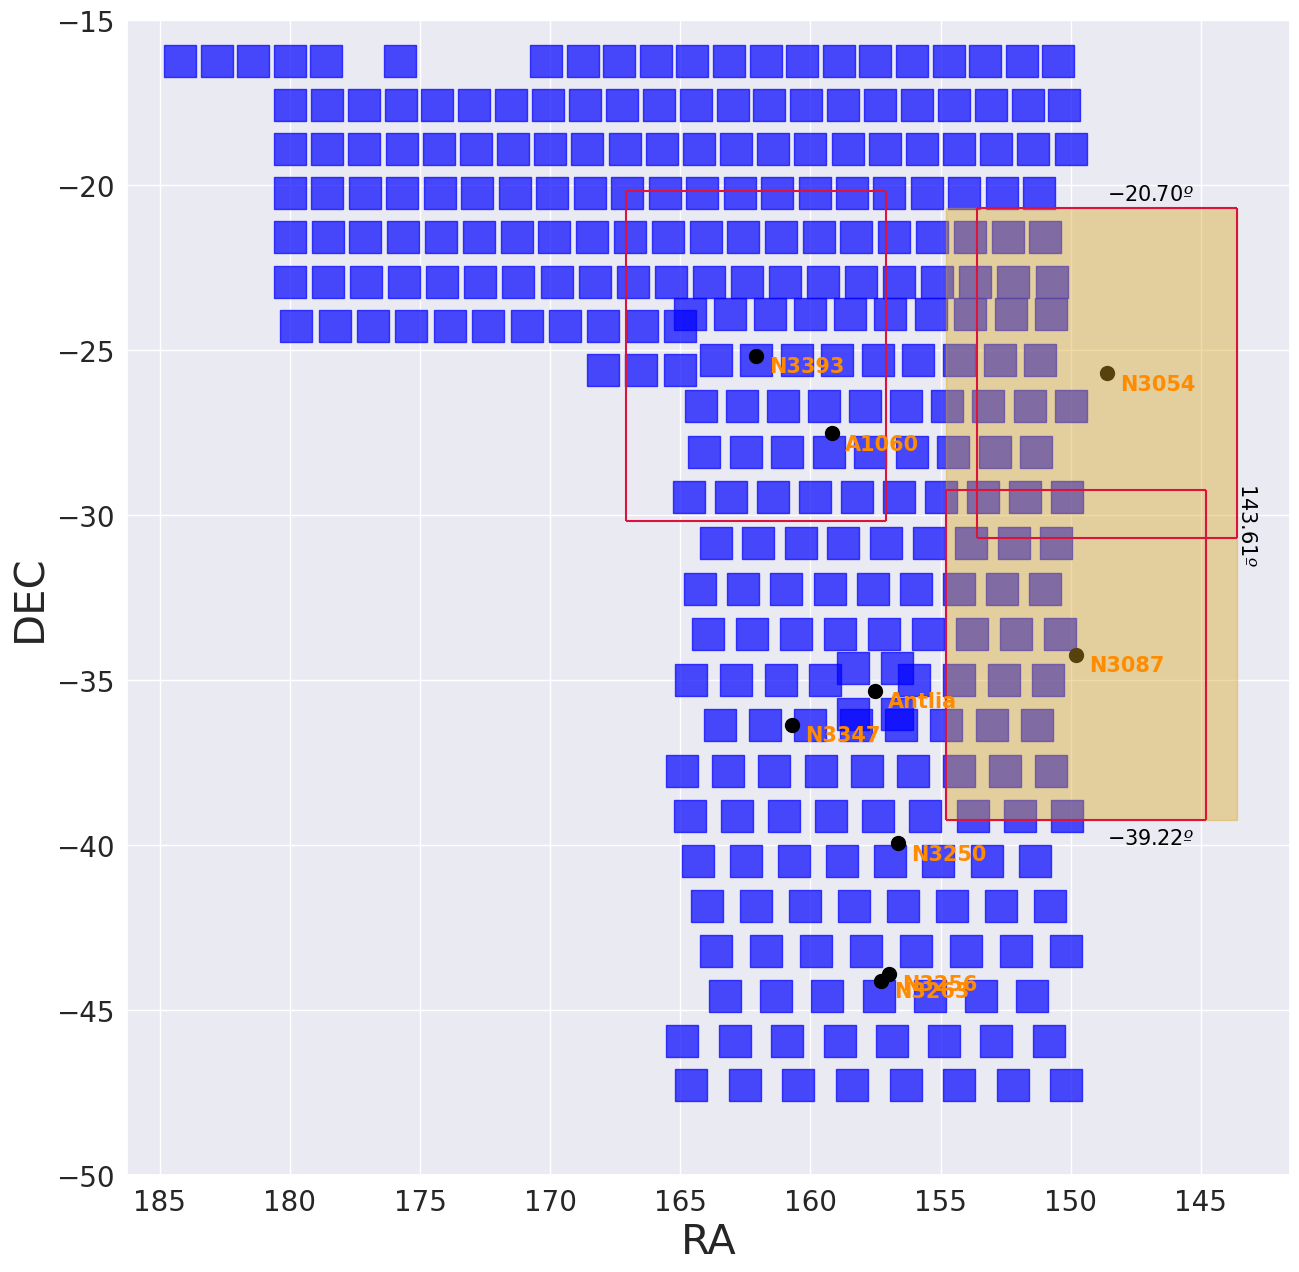

In [11]:
fontsize = 30
labelsize = 20

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)
ax.set_xlabel("RA", fontsize=fontsize)
ax.set_ylabel("DEC", fontsize=fontsize)
ax.xaxis.set_tick_params(labelsize=labelsize, width=3)
ax.yaxis.set_tick_params(labelsize=labelsize, width=3)
# ax.set_title("Hydra-Centaurus fields needed to be observed by S-PLUS", fontsize=fontsize)

ax.scatter(ra[mask_hc], dec[mask_hc], color="blue", s=500, marker='s', alpha=0.7)

dx = 0.5
for ra_i, dec_i, text in zip(cl_ras, cl_decs, cl_names):
    ax.scatter(ra_i, dec_i, marker='o', s = 100, color="black")
    ax.text(ra_i-dx, dec_i-dx, s=text, fontsize=15, fontweight='bold', color='darkorange')

# Draw squares which sides are 5º away from the central point (each of the more removed clusters)    
for ra_j, dec_j in zip([ra_3054, ra_3087, ra_3393], [dec_3054, dec_3087, dec_3393]):    
    ax.vlines(x=ra_j-5, ymin=dec_j-5, ymax=dec_j+5, linestyle='-', color="crimson")
    ax.vlines(x=ra_j+5, ymin=dec_j-5, ymax=dec_j+5, linestyle='-', color="crimson")
    ax.hlines(y=dec_j-5, xmin=ra_j-5, xmax=ra_j+5, linestyle='-', color="crimson")
    ax.hlines(y=dec_j+5, xmin=ra_j-5, xmax=ra_j+5, linestyle='-', color="crimson")

# I have to define ymax and ymin in terms of a fraction of the y axis    
ax.set_ylim(ymin=-50, ymax=-15)
y_range = abs(-50 - (-15))
ymax = ((dec_3054 + 5 + 50) / y_range) 
ymin = ((dec_3087 - 5 + 50) / y_range) 
    
ax.axvspan(xmin=ra_3054-5, xmax=ra_3087+5, ymax=ymax, ymin=ymin, alpha=0.4, color="goldenrod")

ax.text(ra_3054, dec_3054+5+0.5*dx, s=r"${:.2f}º$".format(dec_3054+5), fontsize=15, color='black')
ax.text(ra_3054, dec_3087-5-1.5*dx, s=r"${:.2f}º$".format(dec_3087-5), fontsize=15, color='black')
ax.text(ra_3054-5, dec_3054-5-1.5*dx, s=r"${:.2f}º$".format(ra_3054-5), fontsize=15, color='black', rotation=270)
    
ax.invert_xaxis()

# plt.savefig("../Figures/Hydra-Supercluster/Hydra-Supercluster-Fields.png", dpi='figure', format='png')

### Define a region for Hydra-Centaurus Supercluster

What I have in mind is to simply connect Hydra and Centaurus clusters by a polygon connecting roughly a 5R200 region around their centers.

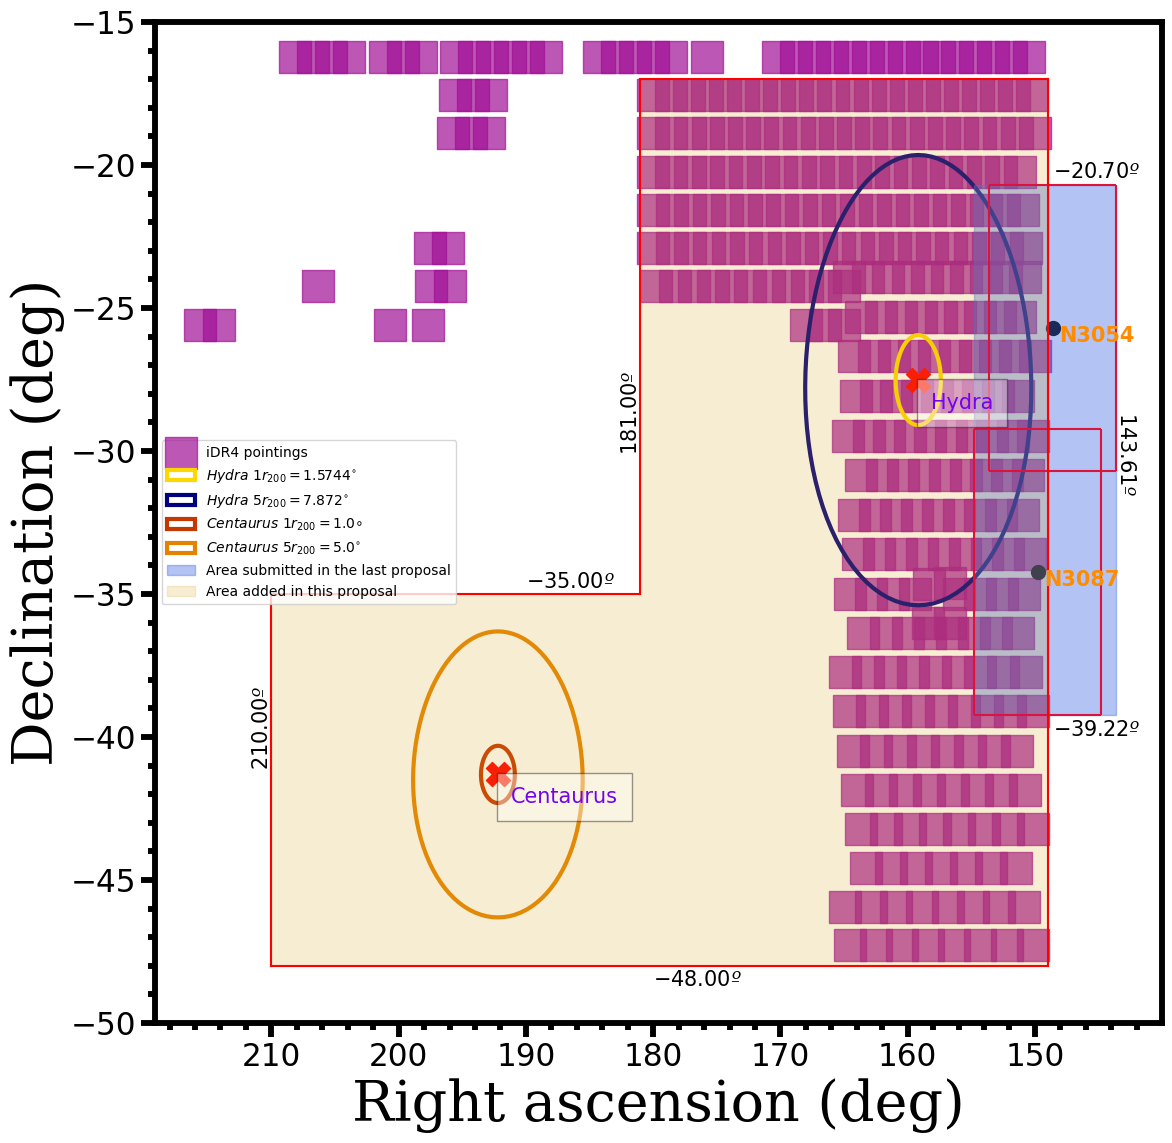

In [45]:
fig = plt.figure(figsize=(13, 13))
ax = fig.add_subplot(111)

ax.set_xlabel("Right ascension (deg)", fontdict=font)
ax.set_ylabel("Declination (deg)", fontdict=font)
ax.minorticks_on()

ax.scatter(ra[mask_hc], dec[mask_hc], color=colors[3], s=500, marker='s', alpha=0.7, label="iDR4 pointings")

dx = 1.0
ax.scatter(ra0_hydra, dec0_hydra, marker="X", s=300, color="red")
ax.text(ra0_hydra-dx, dec0_hydra-dx, s="Hydra", fontsize=15, color=colors[1], 
                bbox=dict(facecolor='white', alpha=0.4, edgecolor='black', pad=10.0))

ax.scatter(ra0_centaurus, dec0_centaurus, marker="X", s=300, color="red")
ax.text(ra0_centaurus-dx, dec0_centaurus-dx, s="Centaurus", fontsize=15, color=colors[1], 
                bbox=dict(facecolor='white', alpha=0.4, edgecolor='black', pad=10.0))

c0_hydra = SkyCoord(ra=ra0_hydra, dec=dec0_hydra, frame='icrs', unit='deg')
s1_hydra = SphericalCircle(c0_hydra, r200_hydra*u.deg, resolution=100, vertex_unit='deg', 
                           lw=3, label=r'$Hydra\ 1 r_{200} = 1.5744^{\circ}$', edgecolor="gold", facecolor="None")
s5_hydra = SphericalCircle(c0_hydra, 5*r200_hydra*u.deg, resolution=100, vertex_unit='deg', 
                           lw=3, label=r'$Hydra\ 5 r_{200} = 7.872^{\circ}$', edgecolor="navy", facecolor="None")

c0_centaurus = SkyCoord(ra=ra0_centaurus, dec=dec0_centaurus, frame='icrs', unit='deg')
s1_centaurus = SphericalCircle(c0_centaurus, r200_centaurus*u.deg, resolution=100, vertex_unit='deg', 
                               lw=3, label=r'$Centaurus\ 1 r_{200} = 1.0{\circ}$', edgecolor=colors[5], facecolor="None")
s5_centaurus = SphericalCircle(c0_centaurus, 5*r200_centaurus*u.deg, resolution=100, vertex_unit='deg', 
                               lw=3, label=r'$Centaurus\ 5 r_{200} = 5.0^{\circ}$', edgecolor=colors[7], facecolor="None")



dx = 0.5
for ra_j, dec_j, text in zip([ra_3054, ra_3087], [dec_3054, dec_3087], ["N3054", "N3087"]):    
    ax.vlines(x=ra_j-5, ymin=dec_j-5, ymax=dec_j+5, linestyle='-', color="crimson")
    ax.vlines(x=ra_j+5, ymin=dec_j-5, ymax=dec_j+5, linestyle='-', color="crimson")
    ax.hlines(y=dec_j-5, xmin=ra_j-5, xmax=ra_j+5, linestyle='-', color="crimson")
    ax.hlines(y=dec_j+5, xmin=ra_j-5, xmax=ra_j+5, linestyle='-', color="crimson")
    
    ax.scatter(ra_j, dec_j, marker='o', s = 100, color="black")
    ax.text(ra_j-dx, dec_j-dx, s=text, fontsize=15, fontweight='bold', color='darkorange')
    
ax.set_ylim(ymin=-50, ymax=-15)
y_range = abs(-50 - (-15))
ymax = ((dec_3054 + 5 + 50) / y_range) 
ymin = ((dec_3087 - 5 + 50) / y_range) 


ax.text(ra_3054, dec_3054+5+0.5*dx, s=r"${:.2f}º$".format(dec_3054+5), fontsize=15, color='black')
ax.text(ra_3054, dec_3087-5-1.5*dx, s=r"${:.2f}º$".format(dec_3087-5), fontsize=15, color='black')
ax.text(ra_3054-5, dec_3054-5-1.5*dx, s=r"${:.2f}º$".format(ra_3054-5), fontsize=15, color='black', rotation=270)
ax.text(180, -48-1.4*dx, s=r"${:.2f}º$".format(-48), fontsize=15, color='black')
ax.text(210+3.0*dx, -41, s=r"${:.2f}º$".format(210), fontsize=15, color='black', rotation=90)
ax.text(190, -35+0.4*dx, s=r"${:.2f}º$".format(-35), fontsize=15, color='black')
ax.text(181+3.0*dx, -30, s=r"${:.2f}º$".format(181), fontsize=15, color='black', rotation=90)


ax.add_patch(s1_hydra)
ax.add_patch(s5_hydra)
ax.add_patch(s1_centaurus)
ax.add_patch(s5_centaurus)

# ax.plot([160, 210], [-17, -35], color="red")
ax.plot([181, 210], [-35, -35], color="red")
ax.plot([181, 181], [-35, -17], color="red")
ax.plot([210, 210], [-35, -48], color="red")
ax.plot([149, 210], [-48, -48], color="red")
ax.plot([149, 149], [-48, -17], color="red")
ax.plot([149, 181], [-17, -17], color="red")

ax.axvspan(xmin=ra_3054-5, xmax=ra_3087+5, ymax=ymax, ymin=ymin, alpha=0.4, color="royalblue",
                label="Area submitted in the last proposal")

ax.fill_between(x=[149, 181, 181, 210], y1=[-48, -48, -48, -48], y2=[-17, -17, -35, -35], alpha=0.2, 
                color="goldenrod", label="Area added in this proposal")

plt.legend(fontsize=10)
ax.invert_xaxis()

plt.savefig("../Figures/Hydra-Supercluster/Hydra-Centaurus-Fields.png", dpi='figure', format='png')